In [1]:
# the runtime with run time compare it with fresh
#what kind of genre is the most popular compare it to fresh 
# length of title whats avg length, see if length has any impact on revenue, production budget and revenue





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Movie_Reviews_RT=pd.read_csv('rt.reviews.tsv',delimiter='\t',encoding='latin')

In [4]:
Movie_Reviews_RT

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [5]:
Movie_Reviews_RT.set_index('id' ,inplace=True)

In [6]:
Movie_Info_RT=pd.read_csv('rt.movie_info.tsv', delimiter= '\t',encoding='latin')

In [7]:
Movie_Info_RT.set_index('id',inplace=True)

In [8]:
RT_Info_Reviews = Movie_Info_RT.join(Movie_Reviews_RT, on='id' ,how='inner',lsuffix='_left', rsuffix='_right')

In [9]:
# the most popular genre is drama, comedy ,comedy/drama,comedy/drama/romance, Action and Adventure
#avg run time is 222
# most popular studio is Universal pics, paramount pics, sony pics , warner bros
#most popular reviews are R,pg-13


In [10]:
RT_Info_Reviews['genre'].value_counts().values

array([7413, 4565, 4177, 2891, 1980, 1925, 1798, 1562, 1540, 1180, 1127,
       1050,  750,  728,  662,  645,  597,  533,  490,  488,  434,  418,
        391,  377,  369,  354,  320,  310,  309,  308,  286,  282,  278,
        276,  271,  270,  266,  261,  248,  247,  243,  243,  242,  234,
        233,  231,  212,  211,  203,  193,  186,  185,  185,  182,  178,
        178,  174,  169,  164,  164,  162,  152,  152,  151,  145,  144,
        141,  140,  139,  135,  132,  131,  131,  131,  130,  126,  126,
        124,  124,  124,  121,  119,  118,  116,  115,  112,  107,  105,
        104,  102,   99,   97,   91,   89,   87,   86,   84,   81,   79,
         78,   77,   76,   75,   75,   74,   74,   67,   66,   65,   64,
         63,   61,   59,   58,   51,   50,   50,   46,   46,   45,   45,
         44,   44,   43,   42,   41,   40,   39,   37,   35,   34,   33,
         32,   32,   32,   32,   31,   31,   31,   30,   30,   29,   29,
         29,   28,   28,   25,   25,   25,   24,   

<BarContainer object of 10 artists>

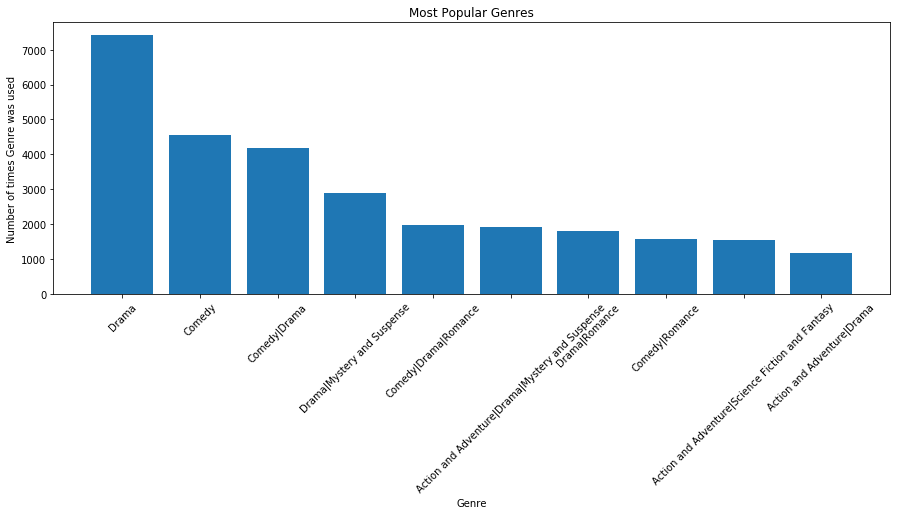

In [11]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of times Genre was used')
plt.title('Most Popular Genres')
plt.bar(RT_Info_Reviews['genre'].value_counts().head(10).index,RT_Info_Reviews['genre'].value_counts().head(10).values)

<BarContainer object of 10 artists>

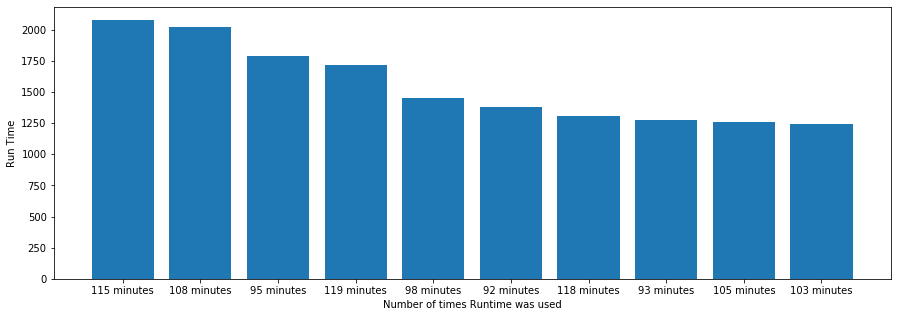

In [12]:
plt.figure(figsize=(15,5)) 
plt.xlabel('Number of times Runtime was used')
plt.ylabel('Run Time')
plt.bar(RT_Info_Reviews['runtime'].value_counts().head(10).index,RT_Info_Reviews['runtime'].value_counts().head(10).values)

In [13]:
RT_Info_Reviews.loc[:,'fresh']

id
3        fresh
3       rotten
3        fresh
3        fresh
3        fresh
         ...  
2000     fresh
2000    rotten
2000    rotten
2000    rotten
2000     fresh
Name: fresh, Length: 54432, dtype: object

In [14]:
RT_Info_Reviews['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [15]:
Movie_Budgets= pd.read_csv('tn.movie_budgets.csv')

In [16]:
Movie_Budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [17]:
Movie_Budgets['worldwide_gross'] = Movie_Budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
        

In [18]:
Movie_Budgets['domestic_gross'] = Movie_Budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [19]:
Movie_Budgets['production_budget'] = Movie_Budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [20]:
Movie_Budgets['total_gross']=Movie_Budgets['worldwide_gross']+Movie_Budgets['domestic_gross']

In [21]:
Movie_Budgets['Revenue']=Movie_Budgets['total_gross']-Movie_Budgets['production_budget']

In [22]:
Movie_Budgets_Name_len=Movie_Budgets['movie'].map(lambda x: len(x))

In [23]:
Movie_Budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,Revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


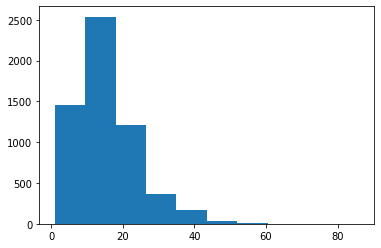

In [24]:
plt.hist(Movie_Budgets_Name_len);

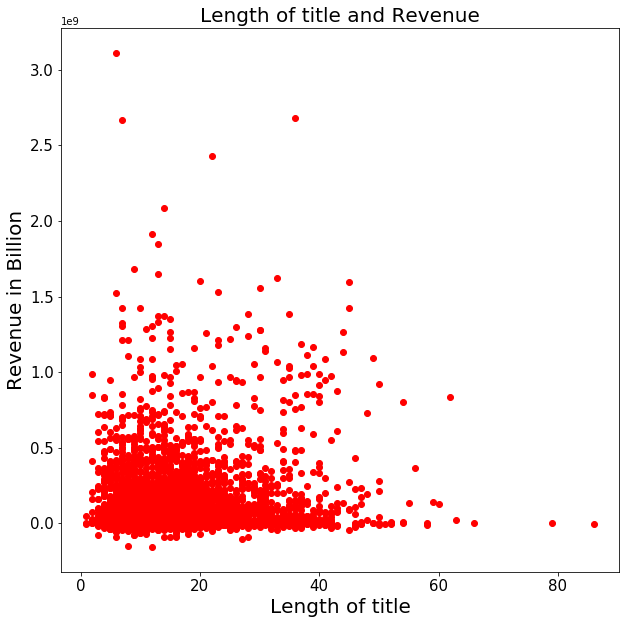

In [25]:
plt.figure(figsize=(10,10))
plt.title('Length of title and Revenue' ,fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Revenue in Billion', fontsize=20)
plt.xlabel('Length of title' ,fontsize=20)
plt.scatter(Movie_Budgets_Name_len, Movie_Budgets.Revenue,color='red')

In [26]:
RT_Info_Reviews.head()

,synopsis,rating_left,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_right,fresh,critic,top_critic,publisher,date
id,,,,,,,,,,,,,,,,,,
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [27]:
RT_Info_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 18 columns):
synopsis        54300 non-null object
rating_left     54346 non-null object
genre           54345 non-null object
director        48992 non-null object
writer          45206 non-null object
theater_date    53206 non-null object
dvd_date        53206 non-null object
currency        33310 non-null object
box_office      33310 non-null object
runtime         53594 non-null object
studio          40125 non-null object
review          48869 non-null object
rating_right    40915 non-null object
fresh           54432 non-null object
critic          51710 non-null object
top_critic      54432 non-null int64
publisher       54123 non-null object
date            54432 non-null object
dtypes: int64(1), object(17)
memory usage: 7.9+ MB


In [28]:
def rotten(rating):
    if rating== 'rotten':
        return 1
    else:
        return 0

In [29]:
RT_Info_Reviews['fresh']=RT_Info_Reviews['fresh'].apply(rotten)

In [30]:
RT_Info_Reviews.head()

,synopsis,rating_left,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_right,fresh,critic,top_critic,publisher,date
id,,,,,,,,,,,,,,,,,,
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,0,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,1,Annalee Newitz,0,io9.com,"May 23, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,0,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,0,Daniel Kasman,0,MUBI,"November 16, 2017"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,0,NaN,0,Cinema Scope,"October 12, 2017"


In [31]:
RT_Rotten=RT_Info_Reviews[RT_Info_Reviews['fresh']==1]

In [32]:
RT_Fresh=RT_Info_Reviews[RT_Info_Reviews['fresh']==0]

In [33]:
def remove_minutes(runtime):
    return runtime.replace('minutes','')

In [34]:
RT_Info_Reviews['runtime'].apply(remove_minutes)

AttributeError: 'float' object has no attribute 'replace'

In [35]:
for idx, row in RT_Info_Reviews.iterrows():
    if type(row.runtime) == str:
        continue
    else:
        print(idx, type(row.runtime))
        break

17 <class 'float'>


In [36]:
print(len(RT_Info_Reviews))

54432


In [37]:
RT_Info_Reviews.dropna(subset=['runtime'] ,inplace=True)

In [38]:
RT_Info_Reviews['runtime']=RT_Info_Reviews['runtime'].apply(remove_minutes)

In [39]:
RT_Info_Reviews['runtime']=RT_Info_Reviews['runtime'].astype(int)

In [40]:
RT_Info_Reviews.dropna(subset=['genre'] ,inplace=True)

<BarContainer object of 5 artists>

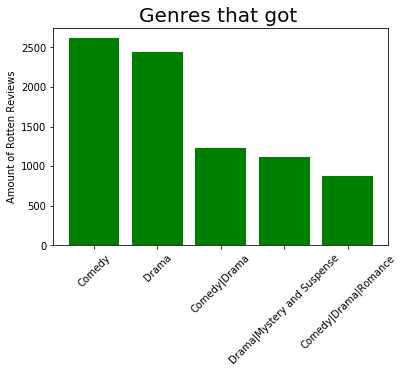

In [41]:
plt.xticks(rotation=45)
plt.title('Genres that got ',fontsize=20)
plt.ylabel('Amount of Rotten Reviews')
plt.bar(RT_Rotten['genre'].value_counts().head().index,RT_Rotten['genre'].value_counts().head().values,color='green')

In [42]:
RT_Info_Reviews['fresh'].value_counts

<bound method IndexOpsMixin.value_counts of id
3       0
3       1
3       0
3       0
3       0
       ..
2000    0
2000    1
2000    1
2000    1
2000    0
Name: fresh, Length: 53593, dtype: int64>

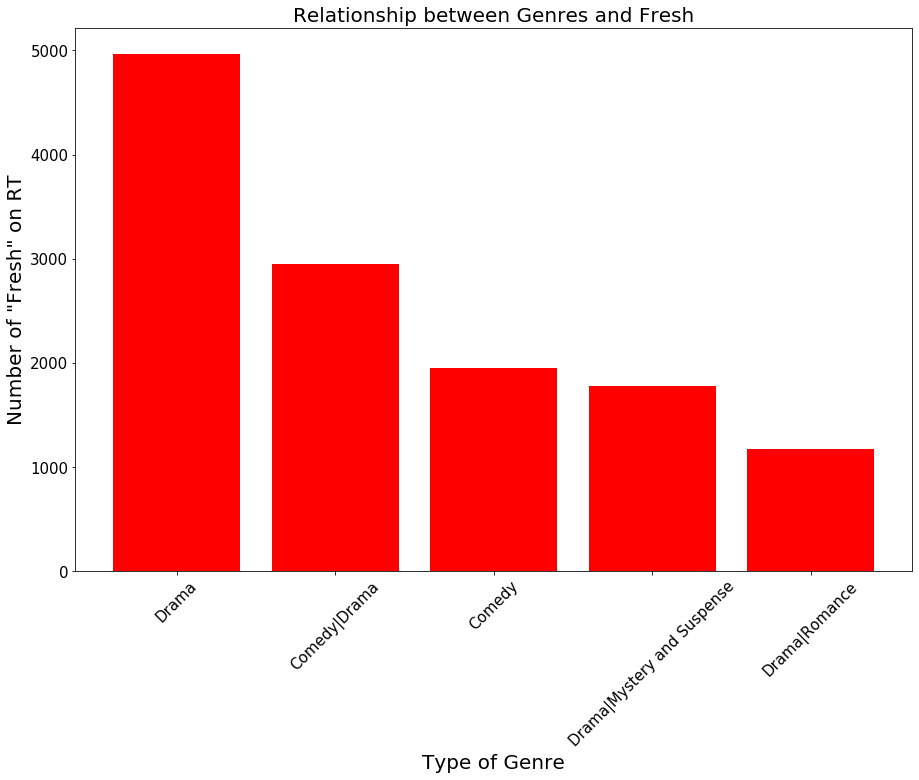

In [43]:

plt.figure(figsize=(15,10))

plt.xlabel('Type of Genre',fontsize=20)
plt.ylabel('Number of "Fresh" on RT',fontsize=20)
plt.xticks(rotation=45,fontsize=15)

plt.yticks(fontsize=15)
plt.title('Relationship between Genres and Fresh' ,fontsize=20)
plt.bar(RT_Fresh['genre'].value_counts().head().index,RT_Fresh['genre'].value_counts().head().values,color='red',Label='Fresh')
plt.show()

<BarContainer object of 5 artists>

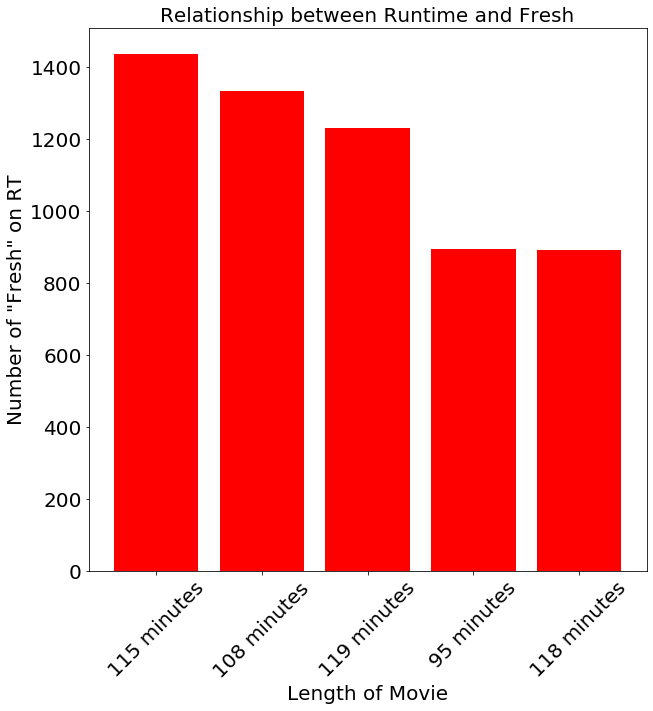

In [44]:
# way to make numbers x axis ordered
plt.figure(figsize=(10,10))
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('Length of Movie', fontsize=20)
plt.ylabel('Number of "Fresh" on RT',fontsize=20)
plt.title('Relationship between Runtime and Fresh',fontsize=20)
plt.bar(RT_Fresh['runtime'].value_counts().head().index,RT_Fresh['runtime'].value_counts().head().values,color='RED')

In [45]:
Movie_Gross=pd.read_csv('bom.movie_gross.csv')

In [46]:
Movie_Gross.dropna(subset=['studio'],inplace=True)

In [47]:
plt.bar(RT_Rotten[runtime])

NameError: name 'runtime' is not defined

In [50]:
#read me
#intro why does project have val
# final report 
# fatstet way for markdown
#esc m


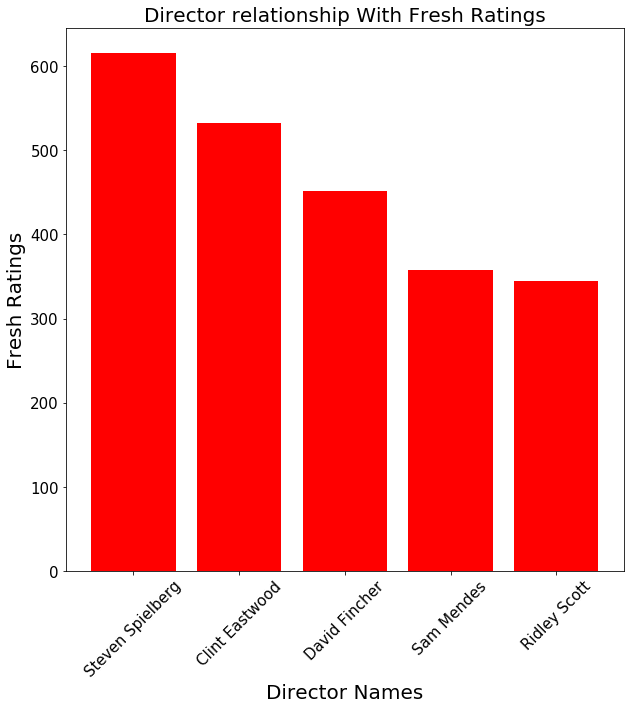

In [108]:
plt.figure(figsize=(10,10))
plt.ylabel('Fresh Ratings',fontsize=20)
plt.title('Director relationship With Fresh Ratings',fontsize=20)
plt.xlabel('Director Names',fontsize=20)
plt.xticks(fontsize=15,rotation=(45))
plt.yticks(fontsize=15)
plt.bar(RT_Fresh['director'].value_counts().head().index, RT_Fresh['director'].value_counts().head().values, color='red');

<BarContainer object of 5 artists>

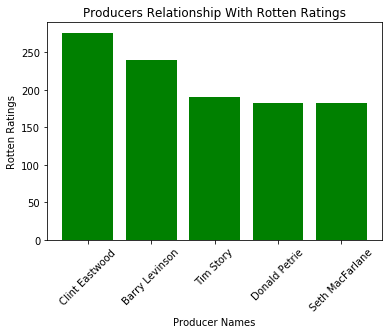

In [60]:
plt.ylabel('Rotten Ratings')
plt.title('Producers Relationship With Rotten Ratings')
plt.xlabel('Producer Names')
plt.xticks(rotation=(45))
plt.bar(RT_Rotten['director'].value_counts().head().index, RT_Rotten['director'].value_counts().head().values, color='Green')

In [109]:
plt.plot()

,synopsis,rating_left,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_right,fresh,critic,top_critic,publisher,date
id,,,,,,,,,,,,,,,,,,
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,0,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,0,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,0,Daniel Kasman,0,MUBI,"November 16, 2017"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,0,NaN,0,Cinema Scope,"October 12, 2017"
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... Cronenberg's Cosmopolis expresses somethin...,NaN,0,Michelle Orange,0,Capital New York,"September 11, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,0,Megan Turner,1,New York Post,"September 27, 2002"
2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,Arguably the best script that Besson has writt...,3.5/5,0,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,Despite Besson's high-profile name being Wasab...,NaN,0,Andy Klein,0,New Times,"September 26, 2002"


<BarContainer object of 5 artists>

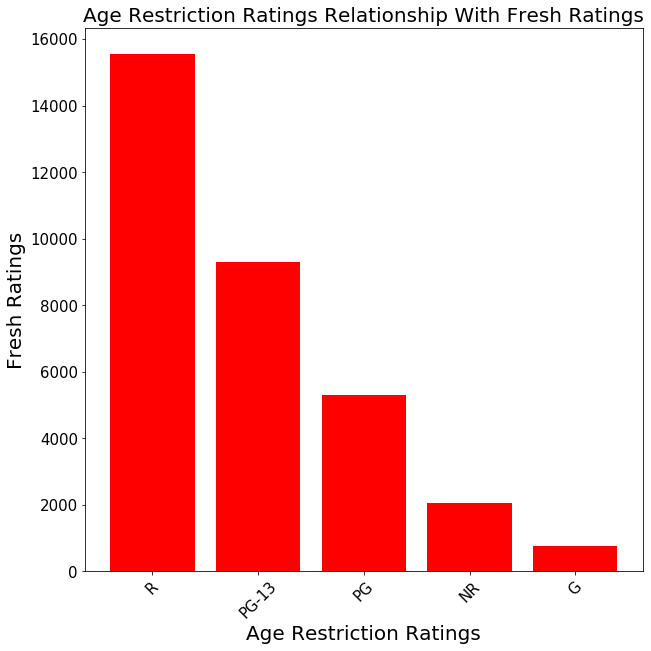

In [52]:
plt.figure(figsize=(10,10))
plt.ylabel('Fresh Ratings',fontsize=20)
plt.title('Age Restriction Ratings Relationship With Fresh Ratings',fontsize=20)
plt.xlabel('Age Restriction Ratings',fontsize=20)
plt.xticks(fontsize=15,rotation=(45))
plt.yticks(fontsize=15)
plt.bar(RT_Fresh['rating_left'].value_counts().head().index, RT_Fresh['rating_left'].value_counts().head().values, color='red')